# 2주차 Report

## 1. Data Load

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv("C:/Project/DeepLearning/Data/abalone.csv", index_col=0) # \는 콜백문자 때문에 \\로 사용한다.
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [4]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

# 문자로 지정된 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['Sex'] = label.fit_transform(df['Sex'])

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


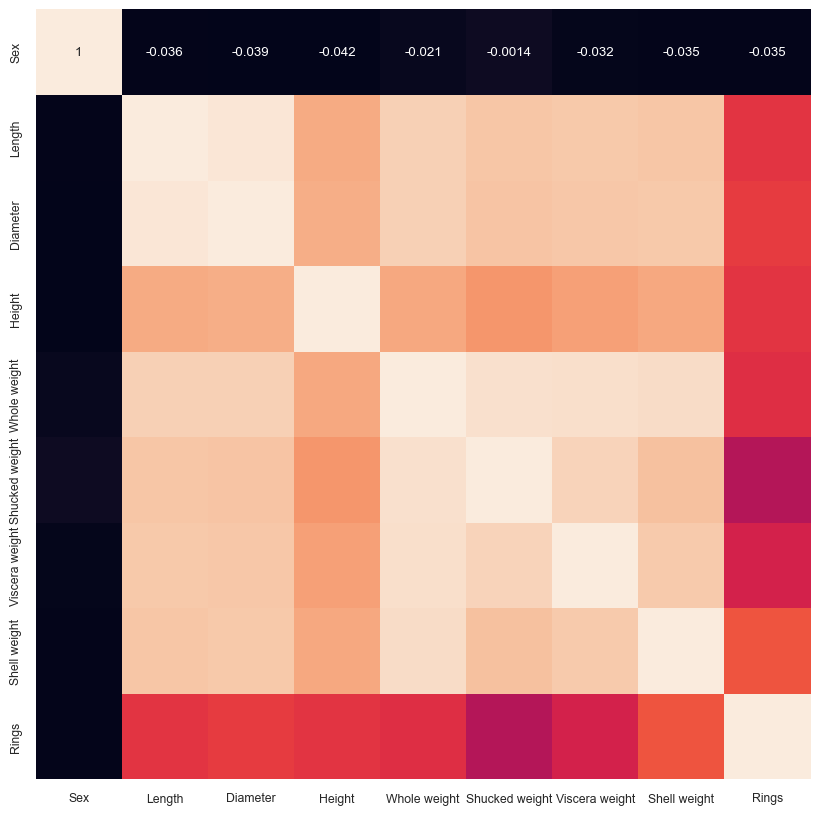

In [5]:
df_corr = df[[ 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']]

#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df_corr.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [6]:
# 데이터 증강 Rings=0, Rings=28
import pandas as pd

# 기존 abalone 데이터셋 로드
# 데이터가 abalone.csv 파일에 있다고 가정

# rings=1인 데이터와 rings=29인 데이터 추출
rings_1_data = df[df['Rings'] == 1].copy()
rings_29_data = df[df['Rings'] == 29].copy()

# rings=1인 데이터를 rings=0으로 변경
rings_1_data['Rings'] = 0

# rings=29인 데이터를 rings=28로 변경
rings_29_data['Rings'] = 28

# 기존 데이터에 rings=0과 rings=28 데이터를 추가
df = pd.concat([df, rings_1_data, rings_29_data], ignore_index=True)

# 추가된 데이터 확인
df['Rings'].value_counts()


Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
0       1
28      1
Name: count, dtype: int64

## 2. Train Test Split

## Deep Learning Regression

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score
import numpy as np

def regression_report(y_true, y_pred):
    
    error = y_true - y_pred
    percentil = [5,25,50,75,95]
    percentil_value = np.percentile(error, percentil)
    
    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred))
    ]
    
    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}')
        
    print('\nPercentiles:')
    for p, pv in zip(percentil, percentil_value):
        print(f'{p: 25d}: {pv:>20.3f}')

In [24]:
X=df.drop('Rings', axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [25]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
0       1
28      1
Name: count, dtype: int64

In [26]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
2788,0,0.615,0.460,0.150,1.0265,0.4935,0.2010,0.2745
1752,2,0.710,0.560,0.220,2.0150,0.9215,0.4540,0.5660
2224,0,0.550,0.425,0.145,0.7970,0.2970,0.1500,0.2650
3389,2,0.565,0.465,0.150,1.1285,0.3770,0.3525,0.3300
3851,2,0.560,0.440,0.130,0.8255,0.2425,0.2020,0.2850
...,...,...,...,...,...,...,...,...
1033,2,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770
3264,0,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850
1653,2,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535
2607,0,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185


In [12]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [28]:
X_train.shape[1]

8

In [29]:
y_test.shape[1]

30

In [30]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from tensorflow.keras import layers

In [37]:
# Define the input layer
inputs = Input(shape=(X_train.shape[1],))

# Define the model architecture
x = Dense(8, activation='relu')(inputs)
x = Dense(30, activation='relu')(x)
x = Dense(30, activation='relu')(x)
predictions = Dense(1)(x) # Regression = 출력이 1이다..

# Create the model
model = Model(inputs=inputs, outputs=predictions)

# Compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

# Print the model summary
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_12 (Dense)            (None, 8)                 72        
                                                                 
 dense_13 (Dense)            (None, 30)                270       
                                                                 
 dense_14 (Dense)            (None, 30)                930       
                                                                 
 dense_15 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1303 (5.09 KB)
Trainable params: 1303 (5.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model_history=model.fit(x=X_train, y=y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
pred_DL = model.predict(X_test)

Epoch 1/20
98/98 [==============================] - 3s 10ms/step - loss: 0.0324 - mse: 0.0324 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 2/20
98/98 [==============================] - 1s 6ms/step - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 3/20
98/98 [==============================] - 1s 6ms/step - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 4/20
98/98 [==============================] - 1s 9ms/step - loss: 0.0323 - mse: 0.0323 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 5/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0323 - val_mse: 0.0323
Epoch 6/20
98/98 [==============================] - 1s 9ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 7/20
98/98 [==============================] - 1s 10ms/step - loss: 0.0322 - mse: 0.0322 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 8/20
98/98 [==============================] - 1s 12ms/step - loss: 0.0322 - mse: 

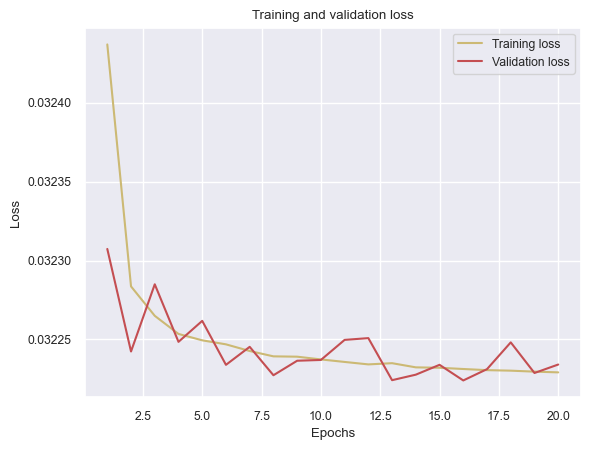

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

In [41]:
model.evaluate(X_test, y_test)

33/33 [==============================] - 0s 3ms/step - loss: 0.0322 - mse: 0.0322


[0.032234128564596176, 0.032234128564596176]